# Bank Churners data analysis

Analysing which customers tend to churn the most. We'll inspect age, gender, financial income, educational background and a type of credit card to see, which customers a bank should try harder to retain. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read in the file.

In [2]:
df = pd.read_csv("/content/drive/MyDrive/BankChurners.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


Checking if gender impacts churining.

In [3]:
att_vs_ex = pd.crosstab(
                 index = df['Gender'],      
                 columns = df['Attrition_Flag'],   
                 normalize = 'index')
att_vs_ex

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,0.173572,0.826428
M,0.146152,0.853848


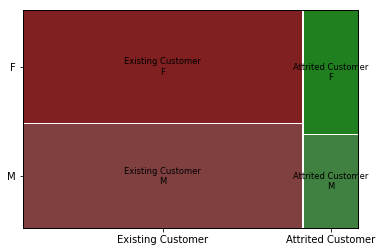

In [4]:
_=mosaic(df, index = ['Attrition_Flag', 'Gender'])

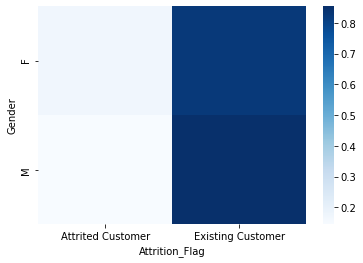

In [5]:
sns.heatmap(att_vs_ex,cmap = plt.cm.Blues)

We can see that, though it's not a huge difference, women tend to churn more often.

Income Category filter.

In [6]:
Income_vs_Att = pd.crosstab(
            index = df['Income_Category'],      
            columns = df['Attrition_Flag'],    
            normalize = 'index')
Income_vs_Att

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,0.173315,0.826685
$40K - $60K,0.151397,0.848603
$60K - $80K,0.134807,0.865193
$80K - $120K,0.157655,0.842345
Less than $40K,0.171862,0.828138
Unknown,0.168165,0.831835


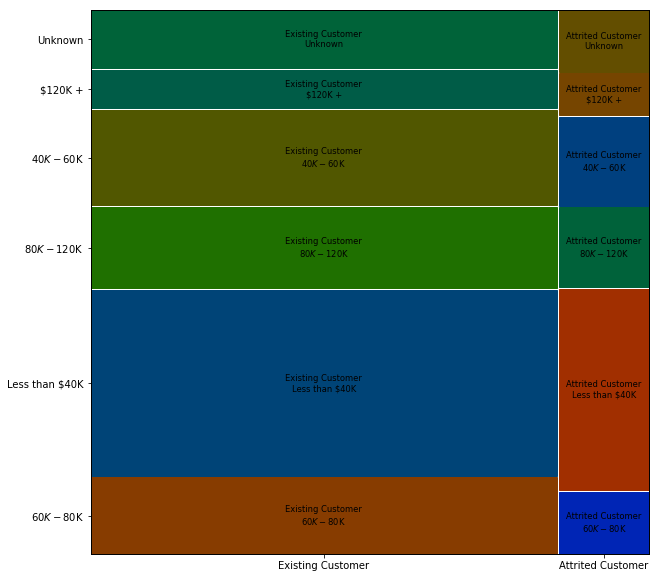

In [7]:
fig = plt.figure(figsize = (10,10))  
ax = fig.add_subplot(111)

_=mosaic(df,
         index = ['Attrition_Flag', 'Income_Category'],
         ax = ax, 
         statistic = True
        )

We can see that income category is not the most important factor.

Card Category filter.

In [8]:
Card_vs_att = pd.crosstab(
            index = df['Card_Category'],    # Rows
            columns = df['Attrition_Flag'],    # Columns
            normalize = 'index'        # Row wise proportion
           )
Card_vs_att

Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,0.160979,0.839021
Gold,0.181034,0.818966
Platinum,0.250000,0.750000
Silver,0.147748,0.852252


# Visualizing attrited customers and each fuature.

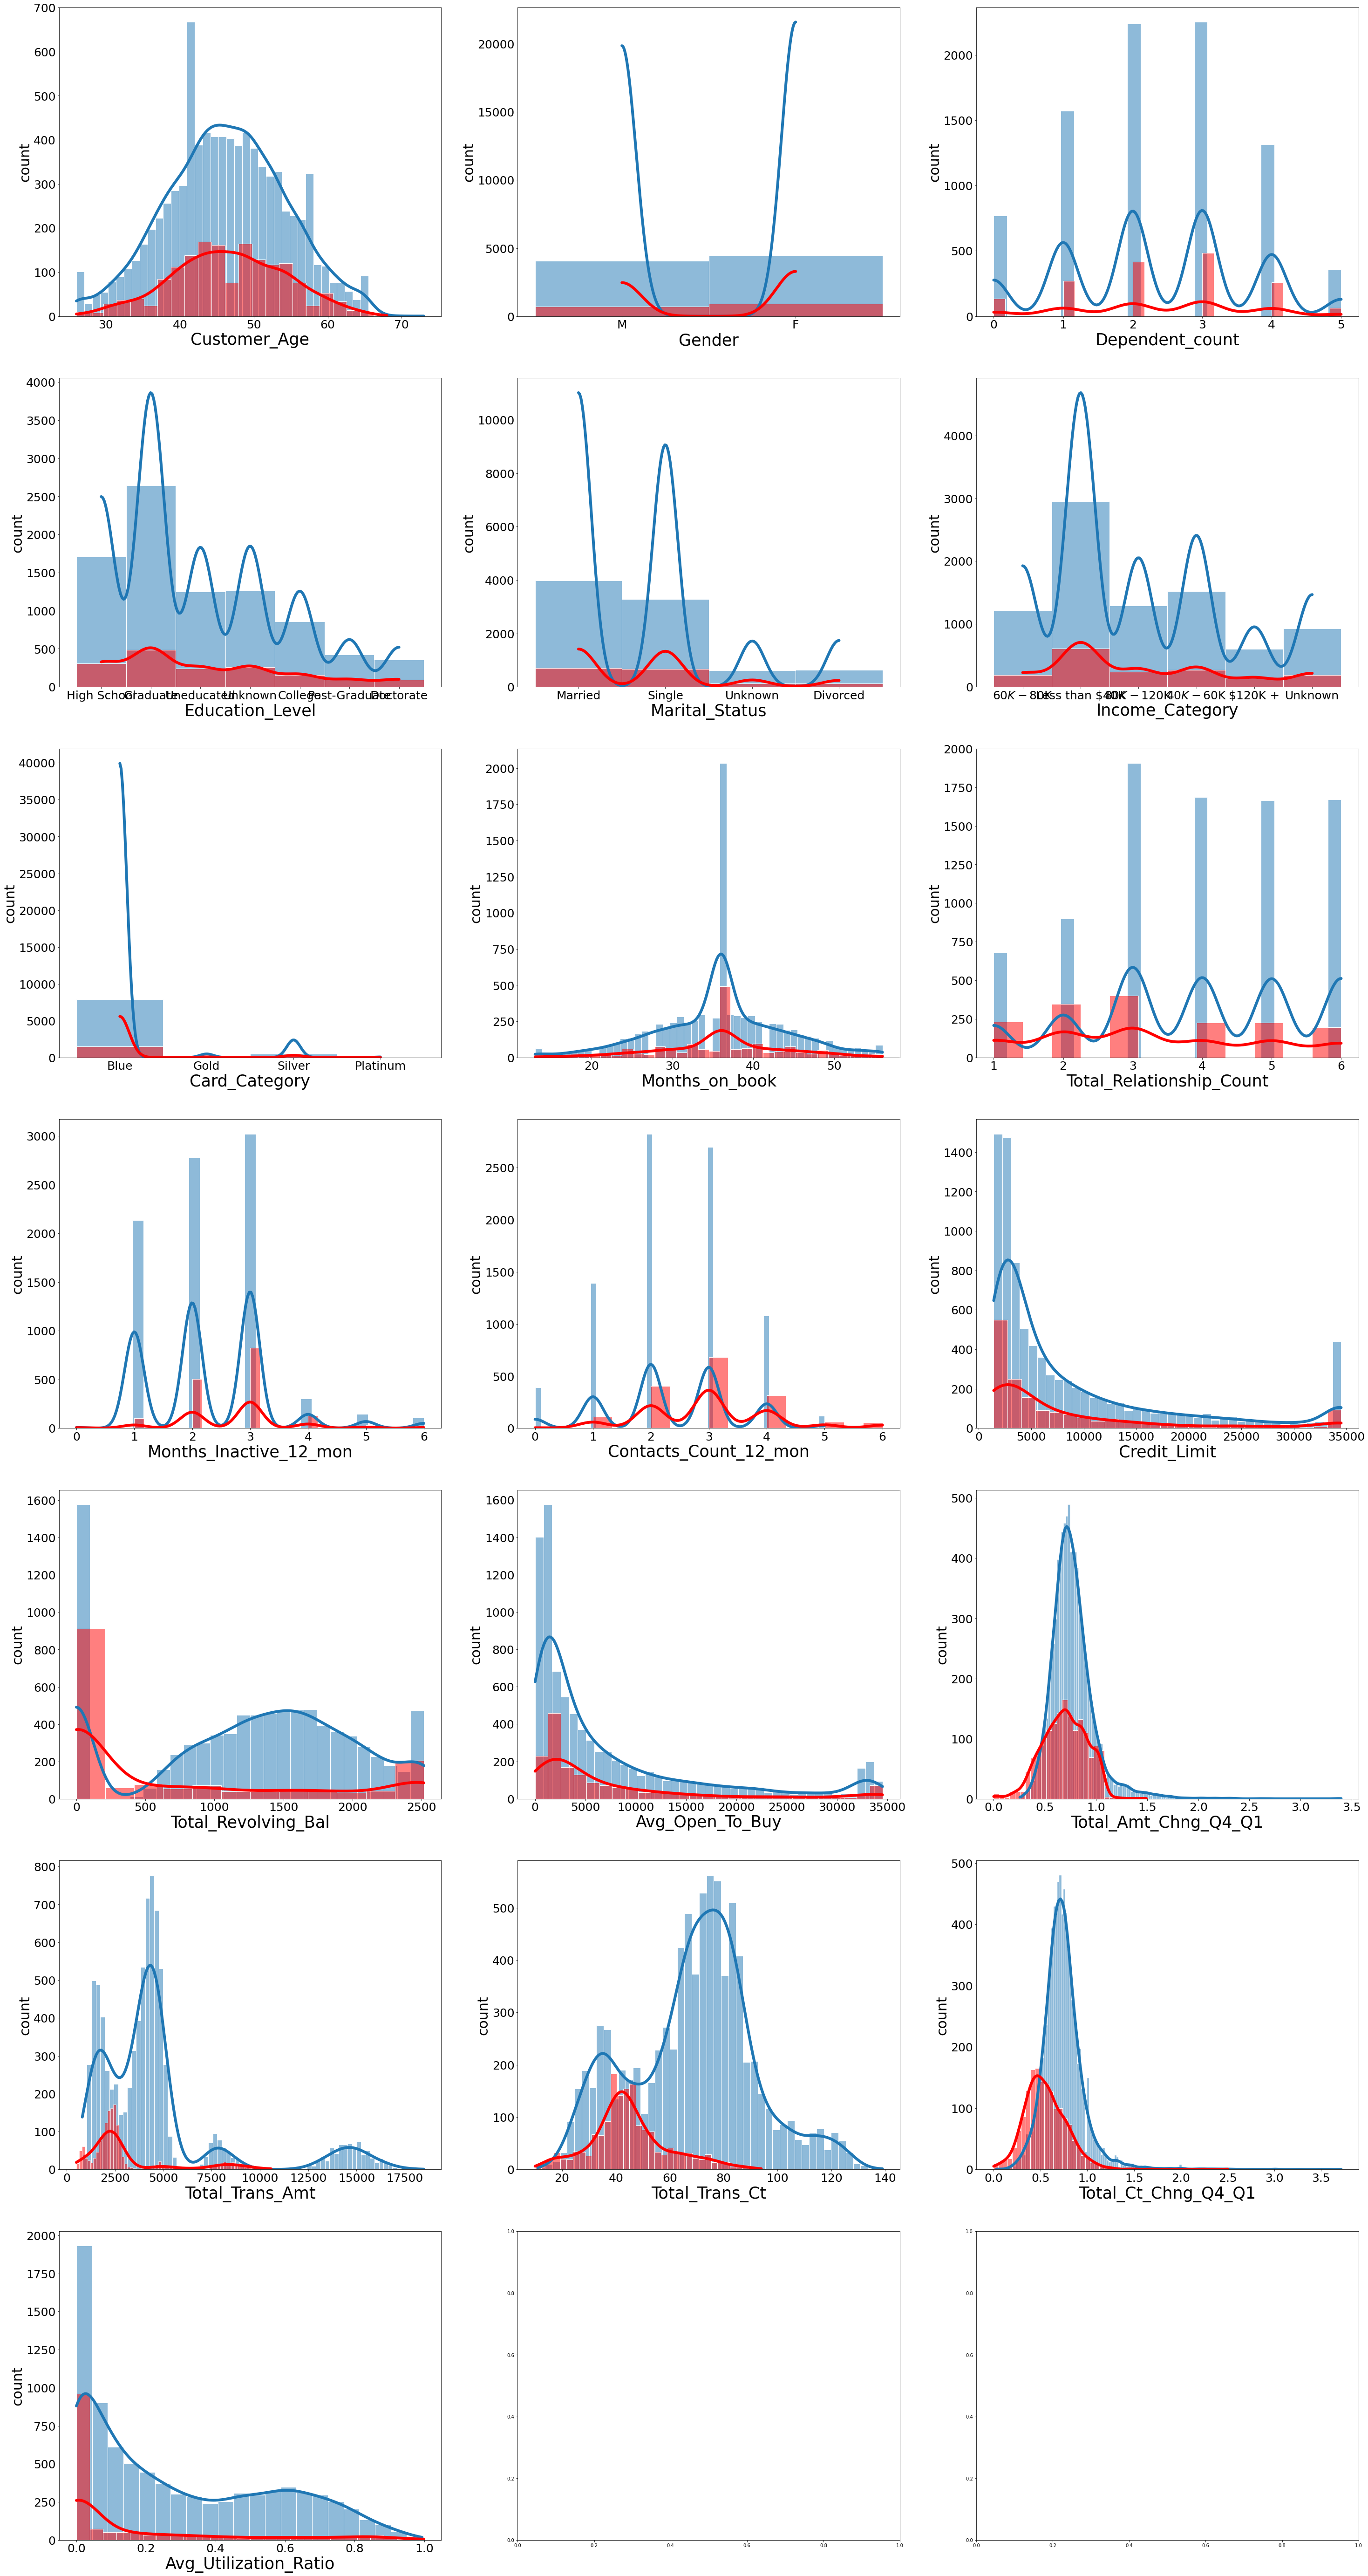

In [9]:
cols = list(df.columns)
number = 0
fig,axs = plt.subplots(7,3,figsize=(50,100),edgecolor='k')
axs = axs.ravel()
for j in cols[2:-2]: # Iterating over the columns of interest
    sns.set_style('ticks')
    sns.histplot(df.loc[df['Attrition_Flag']=='Existing Customer' , j], 
                 label = 'Existing', kde = True , 
                 line_kws=dict(linewidth=6), ax = axs[number])
    sns.histplot(df.loc[df['Attrition_Flag']=='Attrited Customer' , j], 
                 label = 'Attrited', kde = True , 
                 line_kws=dict(linewidth=6), ax = axs[number],color='red')
  
    
    plt.setp(axs[number].get_title(), fontsize='20')
    axs[number].set_xlabel(j,fontsize=35)
    axs[number].set_ylabel('count',fontsize=30)
    axs[number].tick_params(axis='both',labelsize = '25')
    plt.savefig('/content/drive/MyDrive/')
    number+=1

Credit Limit Filter.

In [10]:
df.groupby('Attrition_Flag')['Credit_Limit'].nlargest(50, 'first')

Attrition_Flag         
Attrited Customer  61      34516.0
                   1025    34516.0
                   1251    34516.0
                   1311    34516.0
                   1707    34516.0
                            ...   
Existing Customer  900     34516.0
                   957     34516.0
                   994     34516.0
                   1012    34516.0
                   1021    34516.0
Name: Credit_Limit, Length: 100, dtype: float64

In [11]:
df.sort_values('Credit_Limit', ascending=False)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
7032,715130808,Existing Customer,45,M,3,Graduate,Single,$60K - $80K,Silver,34,5,1,1,34516.0,1664,32852.0,0.730,4912,80,0.739,0.048,0.000031,0.999970
6411,817607358,Attrited Customer,44,F,2,High School,Unknown,Unknown,Gold,35,3,3,3,34516.0,0,34516.0,0.767,2227,44,0.630,0.000,0.997060,0.002942
1437,715870758,Existing Customer,35,M,4,Graduate,Married,$120K +,Blue,30,4,3,4,34516.0,1018,33498.0,1.129,2350,55,0.774,0.029,0.000541,0.999460
9474,754443033,Attrited Customer,50,M,1,Graduate,Single,$80K - $120K,Silver,43,6,3,3,34516.0,432,34084.0,0.807,9045,72,1.000,0.013,0.996120,0.003881
9473,719629308,Attrited Customer,55,F,2,Unknown,Single,Unknown,Silver,37,2,2,3,34516.0,1783,32733.0,0.821,8472,80,0.739,0.052,0.994770,0.005230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,709857033,Existing Customer,60,F,1,College,Single,$40K - $60K,Blue,50,5,1,3,1438.3,0,1438.3,0.578,4148,84,0.714,0.000,0.000085,0.999920
7437,717790233,Existing Customer,37,F,2,College,Single,$40K - $60K,Blue,26,3,2,3,1438.3,743,695.3,0.561,4730,80,0.778,0.517,0.000186,0.999810
1989,719826333,Existing Customer,34,F,2,Doctorate,Single,Less than $40K,Blue,13,5,1,2,1438.3,0,1438.3,0.946,2557,67,0.763,0.000,0.000080,0.999920
4590,716177583,Existing Customer,58,F,1,Post-Graduate,Single,Less than $40K,Blue,36,6,2,4,1438.3,0,1438.3,0.657,4722,89,0.745,0.000,0.000361,0.999640


Based on a few features, I'll create a heatmap to visualise the fatures having the biggest impact on attrition flag.

In [12]:
f = df[['Attrition_Flag', 'Gender', 'Credit_Limit', 'Total_Revolving_Bal']].sort_values('Attrition_Flag')
f[:50]

,Attrition_Flag,Gender,Credit_Limit,Total_Revolving_Bal
10126,Attrited Customer,F,10388.0,1961
8554,Attrited Customer,F,1905.0,0
1721,Attrited Customer,M,11374.0,2517
4150,Attrited Customer,F,1625.0,0
4151,Attrited Customer,F,2121.0,0
8558,Attrited Customer,M,9104.0,145
6362,Attrited Customer,M,12890.0,0
4153,Attrited Customer,F,8668.0,0
8564,Attrited Customer,M,24379.0,1116
8566,Attrited Customer,M,13172.0,0


In [13]:
f[:50].style.background_gradient(cmap='viridis', low=.5, high=0)\
        .set_properties(**{'font-size': '12px'})

,Attrition_Flag,Gender,Credit_Limit,Total_Revolving_Bal
10126,Attrited Customer,F,10388.000000,1961
8554,Attrited Customer,F,1905.000000,0
1721,Attrited Customer,M,11374.000000,2517
4150,Attrited Customer,F,1625.000000,0
4151,Attrited Customer,F,2121.000000,0
8558,Attrited Customer,M,9104.000000,145
6362,Attrited Customer,M,12890.000000,0
4153,Attrited Customer,F,8668.000000,0
8564,Attrited Customer,M,24379.000000,1116
8566,Attrited Customer,M,13172.000000,0


We can see, that the only feature that we may distinguish as important, is credit limit. We can see that it's usually rather low.